In [75]:
poet_death = [24,25,26,28,29,29,29,30,32,33,36,36,37,37,37,37,38,38,39,39,39,39,40,41,42,42,
                 42,42,43,44,44,45,45,45,46,46,46,46,46,47,47,47,48,48,49,49,49,50,50,51,51,51,
                 52,52,52,52,52,53,53,53,54,54,55,55,55,55,56,56,56,56,56,57,57,57,58,58,58,58,
                 59,59,59,59,59,60,60,61,61,62,62,62,62,63,64,64,65,65,65,65,66,66,66,66,67,67,
                 67,67,67,68,68,68,68,68,68,68,68,69,69,69,69,69,69,69,69,70,70,70,70,70,71,71,
                 71,71,71,71,71,71,71,72,72,73,73,73,73,73,73,74,74,74,74,74,74,74,74,74,74,75,
                 75,75,75,75,75,76,76,76,77,77,77,77,78,78,78,78,79,79,79,79,79,79,79,80,80,80,
                 80,81,81,81,81,81,81,81,81,81,82,82,83,83,83,83,83,83,83,83,83,84,84,84,84,85,
                 85,85,85,85,85,85,86,86,86,86,87,87,88,88,88,89,89,89,89,89,89,89,90,90,90,91,
                 91,91,93,93,94,101,107]

In [76]:
singer_death = [21,27,30,33,40,42,43,44,45,46,47,52,53,53,53,54,55,57,60,61,65,69,69,70,72,72,
                    75,77,78,78,79,80,81,82,83,84,85,88,89,93,96]

In [77]:
writer_death = [29,30,34,38,39,40,40,42,43,44,48,48,50,51,51,52,52,52,54,55,55,55,56,56,57,57,
                    57,57,57,58,60,60,60,60,60,61,61,61,62,62,63,63,63,64,64,64,65,65,65,65,65,65,
                    66,66,67,67,67,67,68,68,68,69,69,69,70,70,71,71,71,71,71,71,71,72,72,72,73,73,
                    74,74,74,75,75,75,75,76,76,76,76,77,77,77,77,77,78,78,78,79,79,79,80,80,80,80,
                    81,81,81,81,82,82,82,82,83,83,84,84,85,86,87,88,88,88,89,89,89,90,90,95,95,96,
                    50]

In [130]:
# import pandas library, denoting library as "pd"
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# import a bit of ipython "magic" to get graphs to display in jupyter notebook
%pylab inline           

Populating the interactive namespace from numpy and matplotlib


In [131]:
poet_lifespans=pd.DataFrame(poet_death)
singer_lifespans=pd.DataFrame(singer_death)
writer_lifespans=pd.DataFrame(writer_death)

In [206]:
print("oldest singer: " + str(singer_lifespans.max().item()))
print("oldest poet: " + str(poet_lifespans.max().item()))
print("oldest writer: "+ str(writer_lifespans.max().item()))

oldest singer: 96
oldest poet: 107
oldest writer: 96


In [201]:
print("life expectacnysinger_lifespans.mean().item())
print(poet_lifespans.mean().item())
print(writer_lifespans.mean().item())

62.951219512195124
66.26141078838174
68.22900763358778


/usr/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


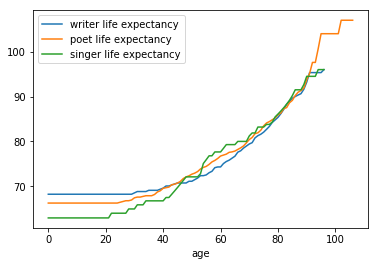

In [176]:
# calculating mean life expectancy at different ages
# note 1. We use poet lifespan max to keep columns all the same size for graphing
# note 2. We separate our for loops to make it easier to follow 

poet_life_expectancy = []
current_age = []
for age in range(0, poet_lifespans.max().item()):
    poet_life_expectancy = poet_life_expectancy + [poet_lifespans[poet_lifespans >= age].mean().item()]
    current_age = current_age + [age]
    
singer_life_expectancy = []
for age in range(0, poet_lifespans.max().item()):
    singer_life_expectancy = singer_life_expectancy + [singer_lifespans[singer_lifespans >= age].mean().item()]   

writer_life_expectancy = []
for age in range(0, poet_lifespans.max().item()):
    writer_life_expectancy = writer_life_expectancy + [writer_lifespans[writer_lifespans >= age].mean().item()]       
    

 
life_expectancy_at_different_ages = pd.DataFrame(
        {"age": current_age,
         "writer life expectancy": writer_life_expectancy,
         "poet life expectancy": poet_life_expectancy,
         "singer life expectancy": singer_life_expectancy
        })


life_expectancy_at_different_ages.plot(x="age", y=["writer life expectancy", "poet life expectancy",
                                                        "singer life expectancy" ])


/usr/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


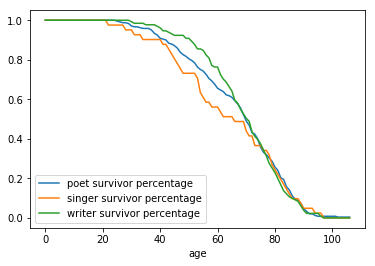

In [200]:
# survivorship curves

poet_survivors = []
poet_survivor_percentages = []
singer_survivors = []
singer_survivor_percentages = []
writer_survivors = []
writer_survivor_percentages = []


current_age = []
total_poets = poet_lifespans.size
total_singers = singer_lifespans.size
total_writers = writer_lifespans.size

for age in range(0, poet_lifespans.max().item()):
    poet_survivors = poet_survivors + [poet_lifespans[poet_lifespans >= age].dropna().size]
    poet_survivor_percentages = poet_survivor_percentages + [poet_survivors[age]/total_poets]
    
    singer_survivors = singer_survivors + [singer_lifespans[singer_lifespans >= age].dropna().size]
    singer_survivor_percentages = singer_survivor_percentages + [singer_survivors[age]/total_singers]
    
    writer_survivors = writer_survivors + [writer_lifespans[writer_lifespans >= age].dropna().size]
    writer_survivor_percentages = writer_survivor_percentages + [writer_survivors[age]/total_writers]
    
    current_age = current_age + [age]

 
survivorship_percentages = pd.DataFrame(
                            {"age": current_age,
                            "poet survivor percentage": poet_survivor_percentages,
                            "singer survivor percentage": singer_survivor_percentages, 
                            "writer survivor percentage": writer_survivor_percentages 
                            })
    
survivorship_percentages.plot(x="age", y=["poet survivor percentage", "singer survivor percentage", 
                                          "writer survivor percentage"] )